In [79]:
## from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt
import os, glob
import wrftools as wrf

run='run_CTRL_rr'
flist=wrf.getflist(run,d=1)
flist=flist[0*24:5*24:6]
flist

['wrfout_d01_2007-09-01_00:00:00',
 'wrfout_d01_2007-09-01_06:00:00',
 'wrfout_d01_2007-09-01_12:00:00',
 'wrfout_d01_2007-09-01_18:00:00',
 'wrfout_d01_2007-09-02_00:00:00',
 'wrfout_d01_2007-09-02_06:00:00',
 'wrfout_d01_2007-09-02_12:00:00',
 'wrfout_d01_2007-09-02_18:00:00',
 'wrfout_d01_2007-09-03_00:00:00',
 'wrfout_d01_2007-09-03_06:00:00',
 'wrfout_d01_2007-09-03_12:00:00',
 'wrfout_d01_2007-09-03_18:00:00',
 'wrfout_d01_2007-09-04_00:00:00',
 'wrfout_d01_2007-09-04_06:00:00',
 'wrfout_d01_2007-09-04_12:00:00',
 'wrfout_d01_2007-09-04_18:00:00',
 'wrfout_d01_2007-09-05_00:00:00',
 'wrfout_d01_2007-09-05_06:00:00',
 'wrfout_d01_2007-09-05_12:00:00',
 'wrfout_d01_2007-09-05_18:00:00']

In [80]:
vmax=[]
t=[]
for f in flist:
    vmap=wrf.getWRF(run,f,'u',z=0)
    vmax.append(np.max(vmap))
    t.append(wrf.getElapsedDays(run,f))

Creating: run_CTRL_rr/wrfout_d01_2007-09-01_00:00:00.u10.raw.npy
Creating: run_CTRL_rr/wrfout_d01_2007-09-01_06:00:00.u10.raw.npy
Creating: run_CTRL_rr/wrfout_d01_2007-09-01_12:00:00.u10.raw.npy
Creating: run_CTRL_rr/wrfout_d01_2007-09-01_18:00:00.u10.raw.npy
Creating: run_CTRL_rr/wrfout_d01_2007-09-02_00:00:00.u10.raw.npy
Creating: run_CTRL_rr/wrfout_d01_2007-09-02_06:00:00.u10.raw.npy
Creating: run_CTRL_rr/wrfout_d01_2007-09-02_12:00:00.u10.raw.npy
Creating: run_CTRL_rr/wrfout_d01_2007-09-02_18:00:00.u10.raw.npy
Creating: run_CTRL_rr/wrfout_d01_2007-09-03_00:00:00.u10.raw.npy
Creating: run_CTRL_rr/wrfout_d01_2007-09-03_06:00:00.u10.raw.npy
Creating: run_CTRL_rr/wrfout_d01_2007-09-03_12:00:00.u10.raw.npy
Creating: run_CTRL_rr/wrfout_d01_2007-09-03_18:00:00.u10.raw.npy
Creating: run_CTRL_rr/wrfout_d01_2007-09-04_00:00:00.u10.raw.npy
Creating: run_CTRL_rr/wrfout_d01_2007-09-04_06:00:00.u10.raw.npy
Creating: run_CTRL_rr/wrfout_d01_2007-09-04_12:00:00.u10.raw.npy
Creating: run_CTRL_rr/wrf

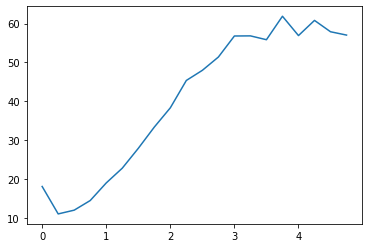

In [81]:
plt.plot(t,vmax)

In [82]:
vmaps=[]
t=[]
for f in flist:
    vmaps.append(wrf.getWRF(run,f,'P',z=0))
#     vmax.append(np.max(vmap))
    t.append(wrf.getElapsedDays(run,f))

Creating: run_CTRL_rr/wrfout_d01_2007-09-01_00:00:00.Psfc.raw.npy
Creating: run_CTRL_rr/wrfout_d01_2007-09-01_06:00:00.Psfc.raw.npy
Creating: run_CTRL_rr/wrfout_d01_2007-09-01_12:00:00.Psfc.raw.npy
Creating: run_CTRL_rr/wrfout_d01_2007-09-01_18:00:00.Psfc.raw.npy
Creating: run_CTRL_rr/wrfout_d01_2007-09-02_00:00:00.Psfc.raw.npy
Creating: run_CTRL_rr/wrfout_d01_2007-09-02_06:00:00.Psfc.raw.npy
Creating: run_CTRL_rr/wrfout_d01_2007-09-02_12:00:00.Psfc.raw.npy
Creating: run_CTRL_rr/wrfout_d01_2007-09-02_18:00:00.Psfc.raw.npy
Creating: run_CTRL_rr/wrfout_d01_2007-09-03_00:00:00.Psfc.raw.npy
Creating: run_CTRL_rr/wrfout_d01_2007-09-03_06:00:00.Psfc.raw.npy
Creating: run_CTRL_rr/wrfout_d01_2007-09-03_12:00:00.Psfc.raw.npy
Creating: run_CTRL_rr/wrfout_d01_2007-09-03_18:00:00.Psfc.raw.npy
Creating: run_CTRL_rr/wrfout_d01_2007-09-04_00:00:00.Psfc.raw.npy
Creating: run_CTRL_rr/wrfout_d01_2007-09-04_06:00:00.Psfc.raw.npy
Creating: run_CTRL_rr/wrfout_d01_2007-09-04_12:00:00.Psfc.raw.npy
Creating: 

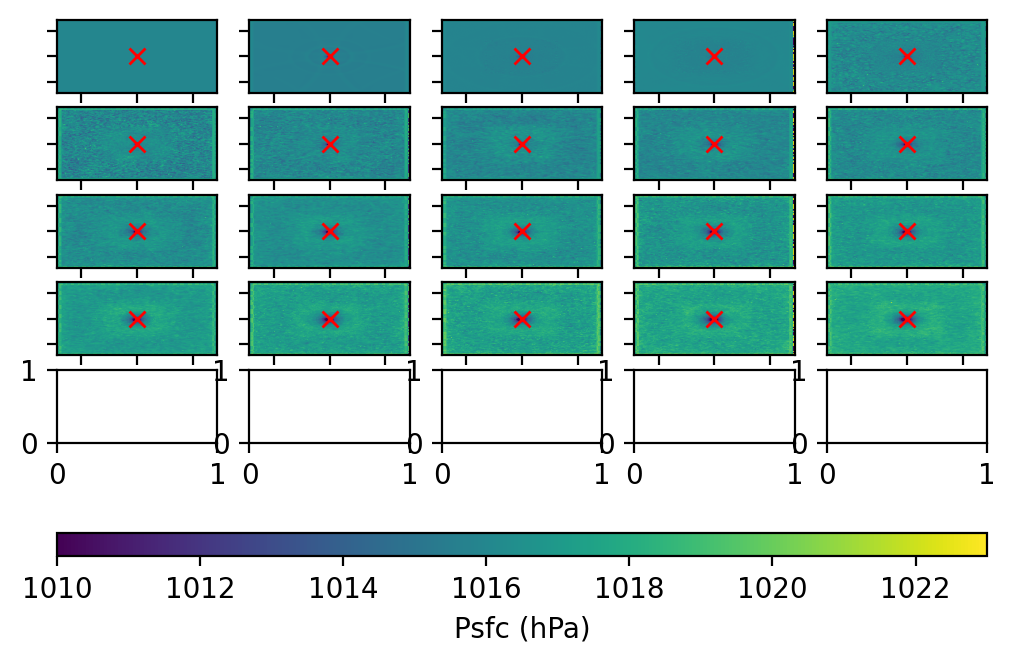

In [83]:
fig,axs=plt.subplots(5,5,dpi=200)
lon,lat=wrf.getCoords(wrf.wopath(run,flist[0]))
def plotsub(ax,t,vmap):
    im=ax.pcolormesh(lon/1000,lat/1000,vmap,cmap=plt.get_cmap('viridis'))
    im.set_clim((1010,1023))
    ax.plot(0,0,'rx')
    ax.axes.xaxis.set_ticklabels([])
    ax.axes.yaxis.set_ticklabels([])
    return(im)

for n,vmap in enumerate(vmaps):
    im=plotsub(axs.flat[n],t[n],vmap)
fig.colorbar(im,ax=axs,orientation='horizontal',aspect=40,label='Psfc (hPa)')